Step 1: Upload CSV file

Step 2: Get the Images

In [3]:


import pandas as pd
import requests
import os


build = 'UCBuildingFinal - More Atlanta Supply.csv.csv'
dat = pd.read_csv(build)


api_key = 'AoKcmMMRXqKeJDh0lUycns3DYQoUEhEaPPX8jx3wdC8aIR7MrkvSv8j2ggtEcT2Y'


save_dir = 'path_to_a_writable_directory/aerial_images_18'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


def download_image(latitude, longitude, api_key, save_path):
    location = f'{latitude},{longitude}'
    bing_url = f'http://dev.virtualearth.net/REST/V1/Imagery/Map/Aerial/{location}/18?mapSize=500,500&key={api_key}'
    response = requests.get(bing_url)

    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f'Downloaded image for location: {location}')
    else:
        print(f'Failed to download image for location: {location}, status code: {response.status_code}')


for index, row in dat.iterrows():

    file_path = os.path.join(save_dir, f'aerial_image_{index + 1}.jpeg')
    download_image(row['Latitude'], row['Longitude'], api_key, file_path)



Downloaded image for location: 25.942085,-80.190785
Downloaded image for location: 32.776839,-97.009772
Downloaded image for location: 38.8711395,-76.7393996
Downloaded image for location: 39.39626926,-77.42830896
Downloaded image for location: 39.943226,-86.248536
Downloaded image for location: 39.9596458,-86.3806032
Downloaded image for location: 35.8476023,-78.8192145
Downloaded image for location: 32.9607794,-97.0364113
Downloaded image for location: 32.787097,-96.886384
Downloaded image for location: 36.0223414,-78.8735121
Downloaded image for location: 32.41564371,-96.83148189
Downloaded image for location: 30.425388,-81.616574
Downloaded image for location: 33.16689414,-96.83341217
Downloaded image for location: 39.778295,-86.102695
Downloaded image for location: 32.153325,-81.23338
Downloaded image for location: 38.8689241,-94.5374539
Downloaded image for location: 32.864253,-97.0334037
Downloaded image for location: 30.4084691,-81.6317565
Downloaded image for location: 33.0020

KeyboardInterrupt: 

Step 3: Sort Images into Folders Based on Building Stage

Import Libraries

In [5]:
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 820.9 kB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 8.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.1/781.1 kB 13.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.4 MB/s eta 0:00:00


In [7]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
import re

def extract_number(text):
    # Regular expression to match any number (integer or floating-point)
    number = re.search(r"[-+]?\d*\.?\d+", text)
    if number:
        return float(number.group())
    else:
        return None

In [9]:
df_col = dat['BuildingStage']
listy = df_col.tolist()

In [10]:
def label_func(f_name):
  f_name = str(f_name)
  res = int(extract_number(f_name))
  return str(listy[res - 1])

In [12]:
import os, shutil
images_folder = "path_to_a_writable_directory/aerial_images_18"

for image_file in os.listdir(images_folder):

    image_name, _ = os.path.splitext(image_file)


    label_name = label_func(image_name)
    class_folder = os.path.join(images_folder, label_name)

    if not os.path.exists(class_folder):
            os.makedirs(class_folder)


    shutil.move(os.path.join(images_folder, image_file), os.path.join(class_folder, image_file))




In [15]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fastai.vision.all import *

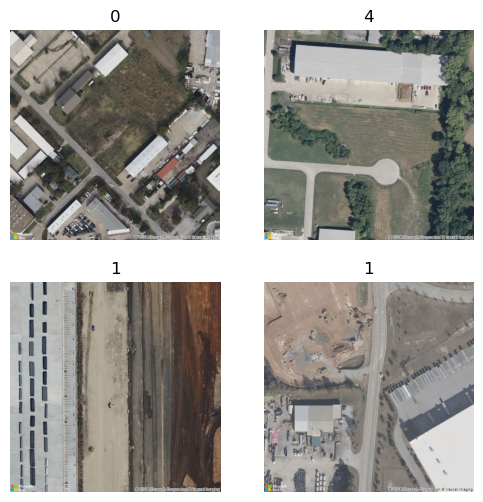

In [17]:
path = Path('path_to_a_writable_directory/aerial_images_18')

dls = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,

).dataloaders(path, bs=4)

dls.show_batch(max_n=4)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=accuracy_multi)
learn.fine_tune(12)

NameError: name 'vision_learner' is not defined

SuggestedLRs(valley=8.31763736641733e-06)

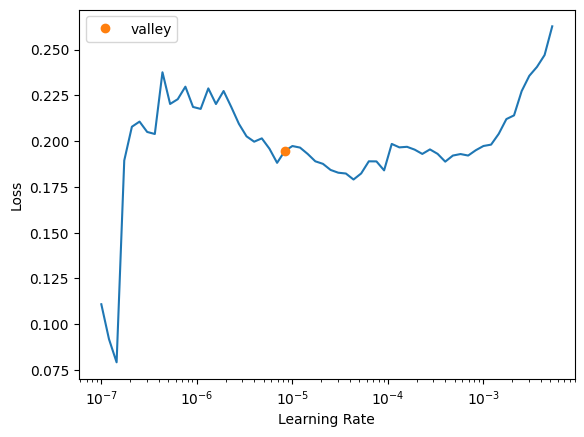

In [ ]:
learn.lr_find()

In [ ]:
interp = Interpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,3,4,"tensor([0.2215, 0.0046, 0.0200, 0.0026, 0.6408])",1.4525331258773804
1,1,,"tensor([0.3718, 0.0026, 0.4286, 0.0079, 0.0627])",1.4084057807922363
2,4,0,"tensor([0.8109, 0.0127, 0.0191, 0.0052, 0.0125])",1.2170839309692383
3,1,,"tensor([0.4360, 0.0112, 0.2172, 0.0834, 0.0870])",1.0976803302764893
4,4,3,"tensor([0.0424, 0.0247, 0.0222, 0.9693, 0.1611])",1.0797971487045288
5,0,4,"tensor([0.0136, 0.2038, 0.0171, 0.0121, 0.5285])",1.0613491535186768
6,3,4,"tensor([0.4734, 0.0059, 0.0162, 0.0772, 0.8524])",1.0278228521347046
7,3,,"tensor([0.0497, 0.0247, 0.1313, 0.0101, 0.2172])",1.0112518072128296
8,0,,"tensor([0.0317, 0.1214, 0.1386, 0.1403, 0.1364])",0.8055346608161926
9,1,,"tensor([0.0333, 0.0324, 0.2801, 0.0056, 0.0910])",0.7786203026771545


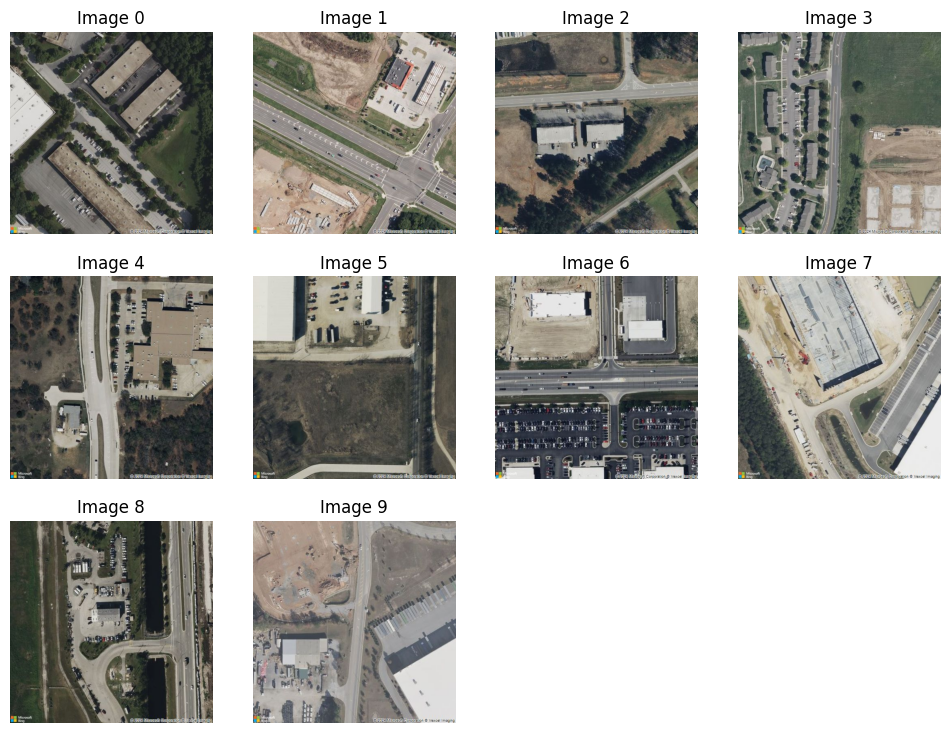

In [ ]:
interp.plot_top_losses(10)

In [ ]:
train_preds, train_targs = learn.get_preds(ds_idx=0)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
def get_max(list1):
  ind = 0    #ind variable to store the index of maximum value in the list
  max_element = list1[0]

  for i in range (1,len(list1)): #iterate over array
    if list1[i] > max_element: #to check max value
      max_element = list1[i]
      ind = i
  #print the index of maximum element
  return ind

In [ ]:
train_preds_final = []
for i in range(len(train_preds)):
    train_preds_final.append(get_max(train_preds[i]))

In [ ]:
train_preds_final

[0,
 0,
 0,
 0,
 3,
 1,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 3,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 4,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 4,
 0,
 4,
 4,
 0,
 0,
 1,
 0,
 0,
 4,
 1,
 0,
 4,
 0,
 4,
 2,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 3,
 4,
 0,
 0,
 4,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 0,
 4,
 2,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 3,
 0,
 0,
 0,
 4,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 4,
 4,
 4,
 0,
 4,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 4,
 0,
 1,
 0,
 0,
 0,
 4,
 3,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 4,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 4,
 1,
 0,
 1,
 1,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 4,
 0,
 1,
 0,
 2,
 0,
 0,
 4,
 0,
 2,
 4,
 1,
 0,
 4,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 4,
 0,
 0,
 2,
 4,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 2,
 0,


In [ ]:
train_targs_final = []
for i in range(len(train_targs)):
    train_targs_final.append(get_max(train_targs[i]))

In [ ]:
len(train_targs_final)
len(train_preds_final)

365

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(train_targs_final, train_preds_final)



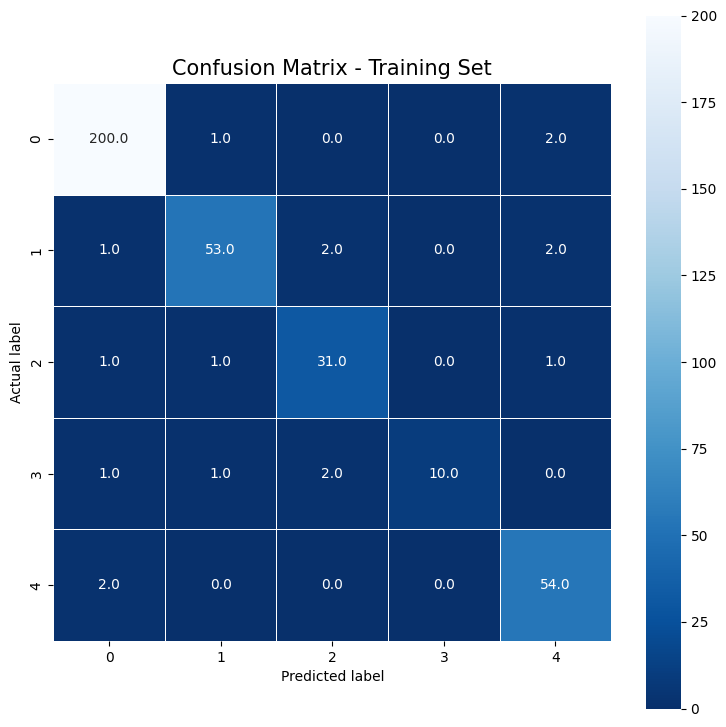

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

plt.title("Confusion Matrix - Training Set", size = 15);

In [ ]:
test_preds, test_targs = learn.get_preds(ds_idx=1)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
test_preds_final = []
for i in range(len(test_preds)):
    test_preds_final.append(get_max(test_preds[i]))


In [ ]:
len(test_preds_final)

91

In [ ]:
test_targs_final = []
for i in range(len(test_targs)):
    test_targs_final.append(get_max(test_targs[i]))

In [ ]:
cm2 = metrics.confusion_matrix(test_targs_final, test_preds_final)

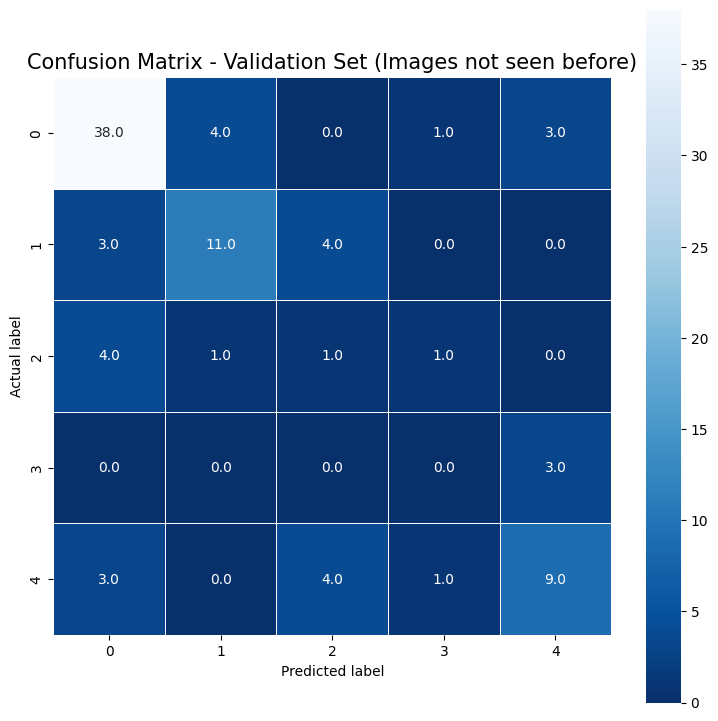

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

plt.title("Confusion Matrix - Validation Set (Images not seen before)", size = 15);